# Census Income Project

>This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) & (AGI>100) & (AFNLWGT>1) & (HRSWK>0)). 

>The prediction task is to determine whether a person makes over $50K a year.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing  import MinMaxScaler
from sklearn.preprocessing  import StandardScaler
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
df=pd.read_csv('Census_Income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape   #checking te data dimensiion

(32560, 15)

In [4]:
df.dtypes   #checking the data types of each column

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


In [7]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
#checking the null values in the dataset
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

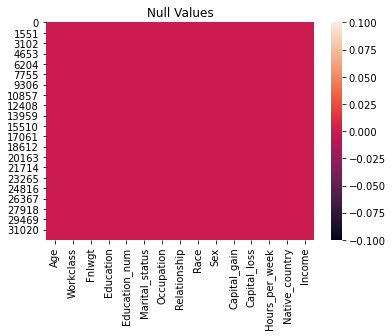

In [9]:
#checking the null values in dataset by using heatmap
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

>As we can see that their is no null values present in the dataset

### Visualization of the data

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

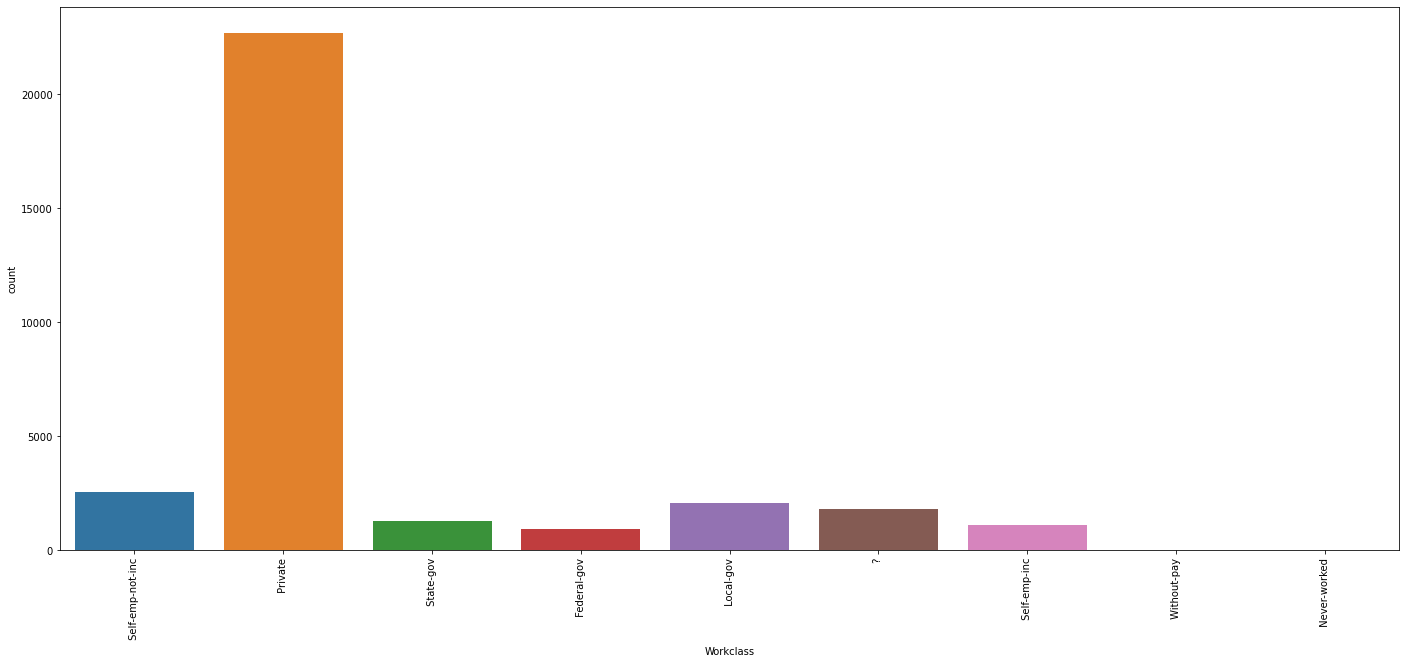

In [10]:
plt.figure(figsize=(24,10))
sns.countplot(df['Workclass']) 
plt.xticks(rotation=90)

>As we can see that majority of the people are having private job.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

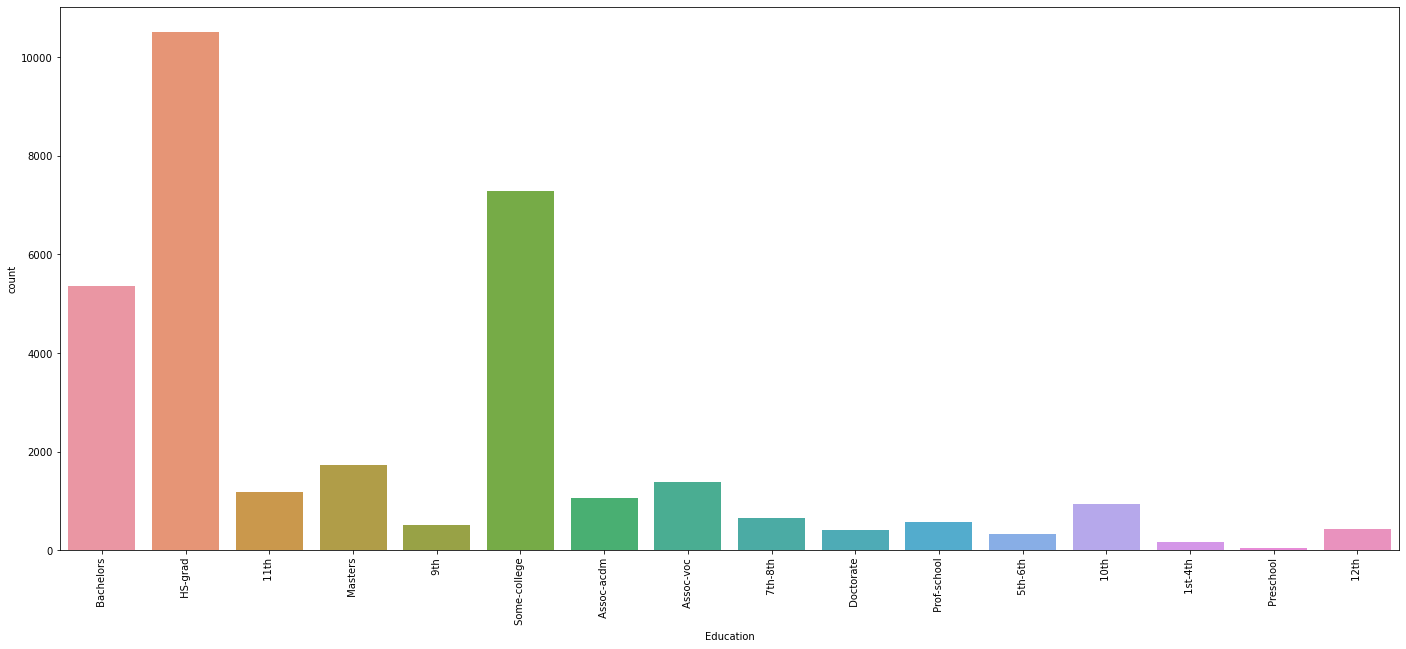

In [11]:
plt.figure(figsize=(24,10))
sns.countplot(df['Education']) 
plt.xticks(rotation=90)

>As we can see from the above graph majority of the people had done 'HS-grad'.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

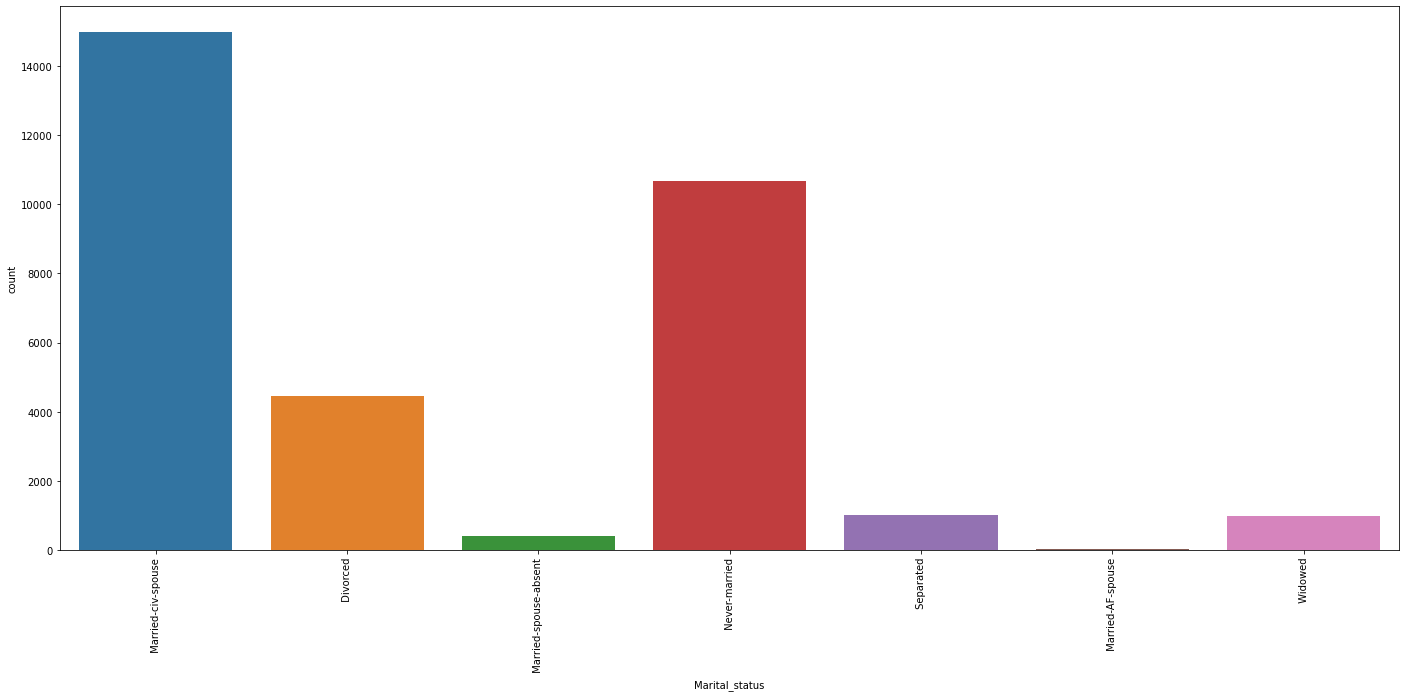

In [12]:
plt.figure(figsize=(24,10))
sns.countplot(df['Marital_status']) 
plt.xticks(rotation=90)

>From above graph we can see that majority of the people are married and have spouse also.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

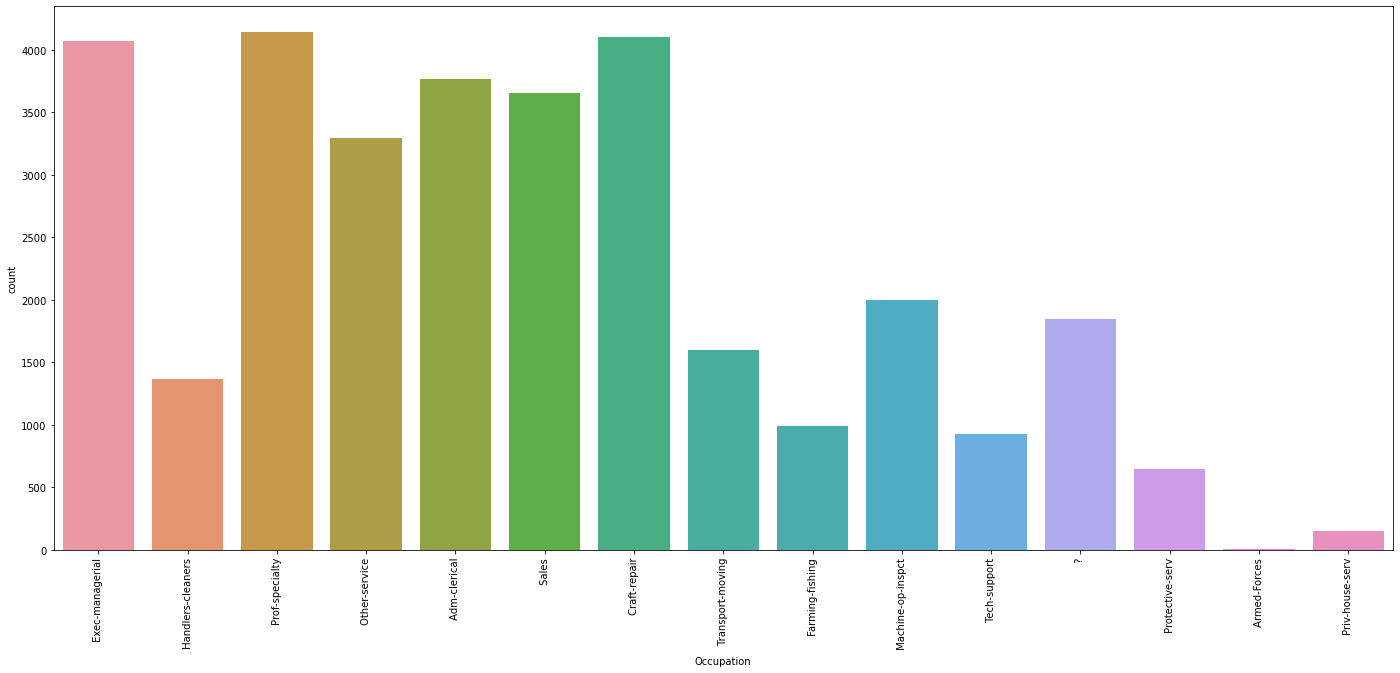

In [13]:
plt.figure(figsize=(24,10))
sns.countplot(df['Occupation']) 
plt.xticks(rotation=90)

>We can see that majority of the people are 'Exec-managerial','Prof-specialty' or 'Craft-repair'.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

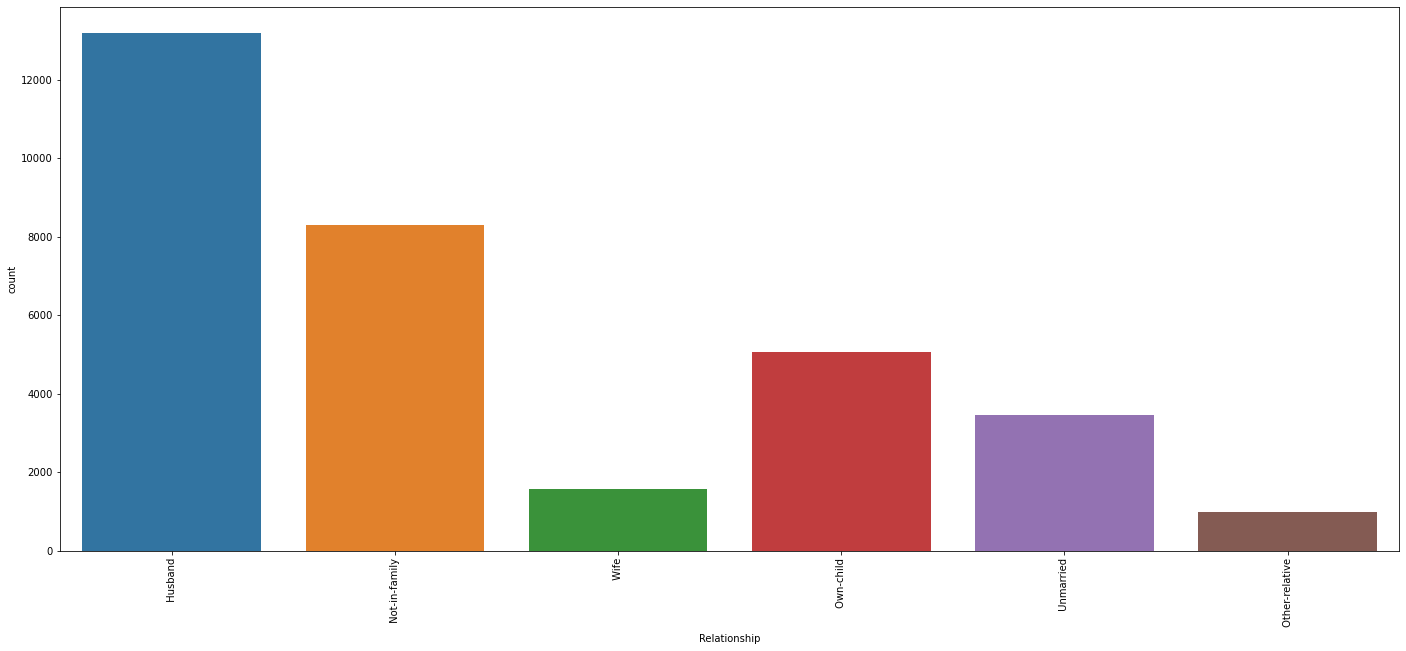

In [14]:
plt.figure(figsize=(24,10))
sns.countplot(df['Relationship']) 
plt.xticks(rotation=90)

>We can see that majority of the people are 'husbands' who are doing job and getting salary.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

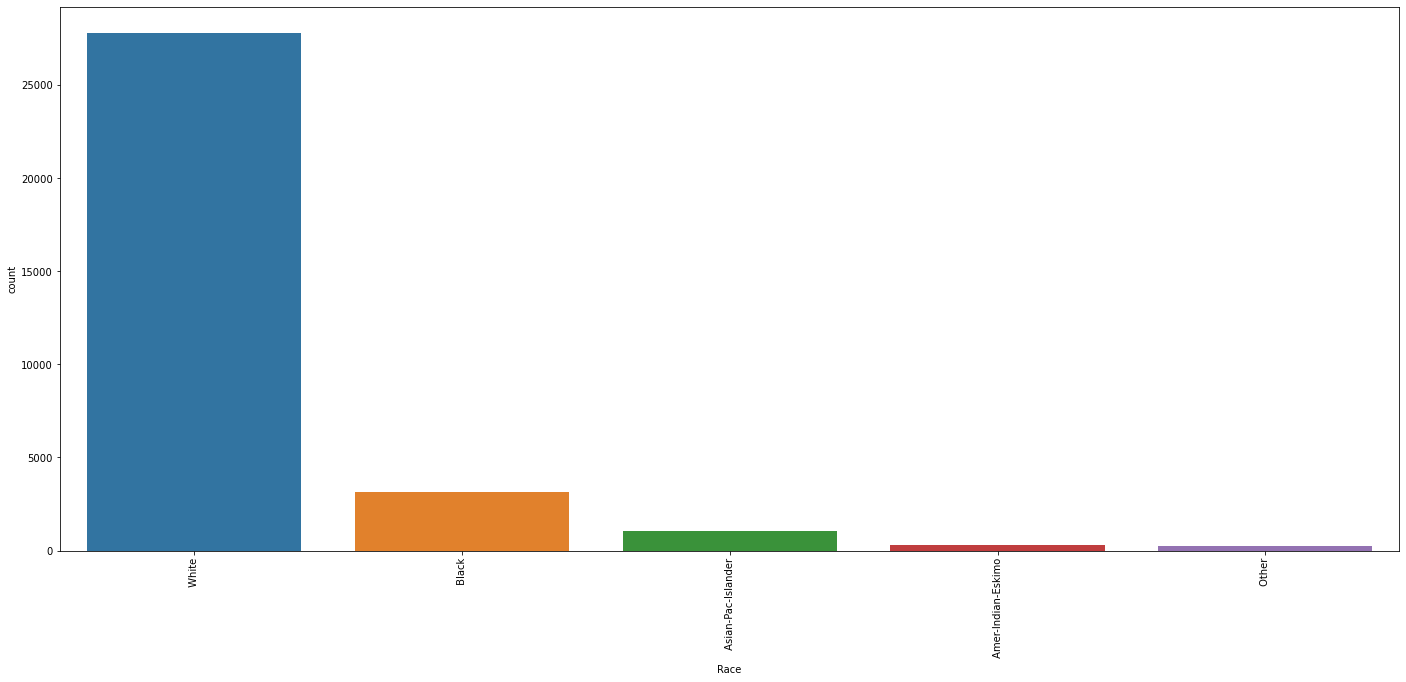

In [15]:
plt.figure(figsize=(24,10))
sns.countplot(df['Race']) 
plt.xticks(rotation=90)

>We can see that majority of the people are white who are getting salary.

(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

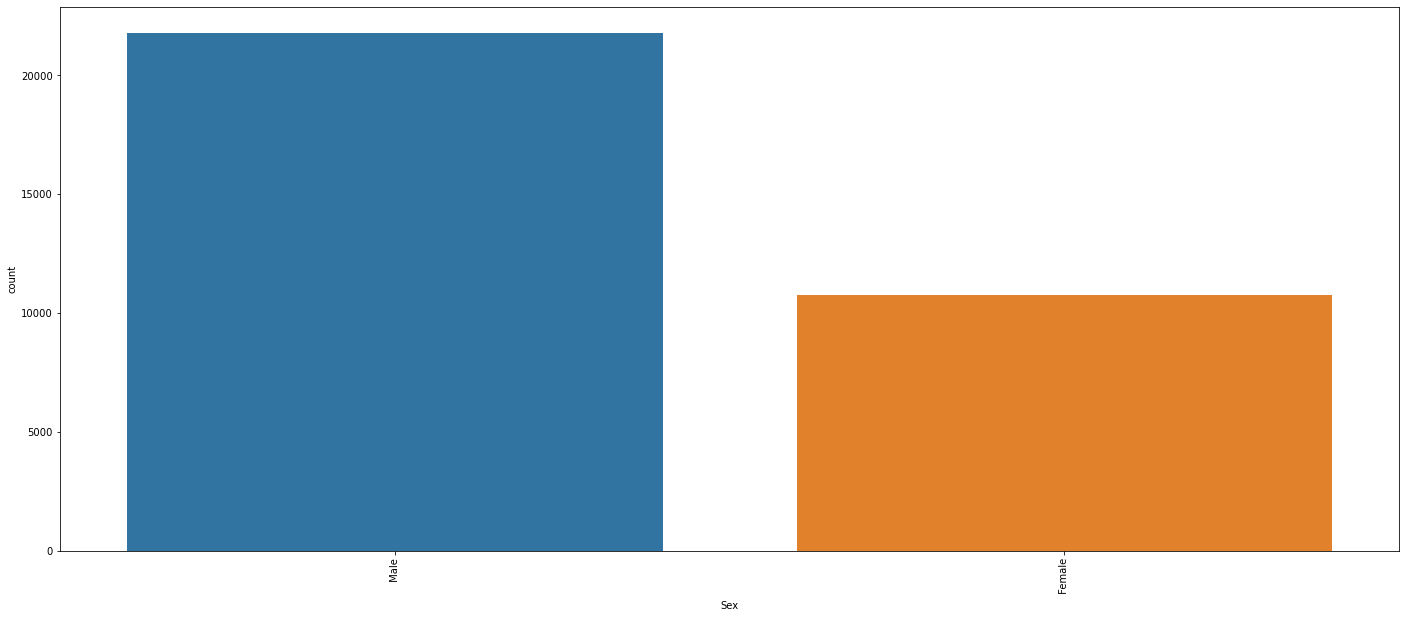

In [16]:
plt.figure(figsize=(24,10))
sns.countplot(df['Sex']) 
plt.xticks(rotation=90)

>From the above graph we can see that majority of the people are 'male'.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Tex

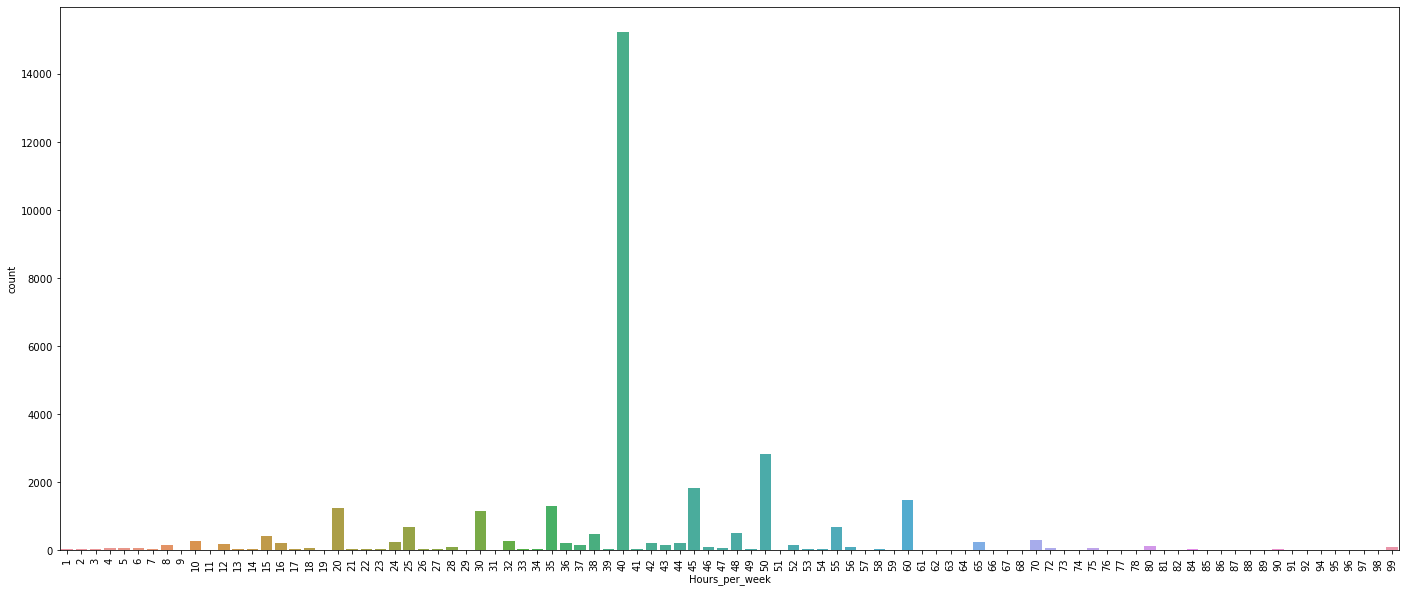

In [17]:
plt.figure(figsize=(24,10))
sns.countplot(df['Hours_per_week']) 
plt.xticks(rotation=90)

>We can see that majority of the people are doing 40 hours per week.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' ?'),
  Text(5, 0, ' Mexico'),
  Text(6, 0, ' South'),
  Text(7, 0, ' Puerto-Rico'),
  Text(8, 0, ' Honduras'),
  Text(9, 0, ' England'),
  Text(10, 0, ' Canada'),
  Text(11, 0, ' Germany'),
  Text(12, 0, ' Iran'),
  Text(13, 0, ' Philippines'),
  Text(14, 0, ' Italy'),
  Text(15, 0, ' Poland'),
  Text(16, 0, ' Columbia'),
  Text(17, 0, ' Cambodia'),
  Text(18, 0, ' Thailand'),
  Text(19, 0, ' Ecuador'),
  Text(20, 0, ' Laos'),
  Text(21, 0, ' Taiwan'),
  Text(22, 0, ' Haiti'),
  Text(23, 0, ' Portugal'),
  Text(24, 0, ' Dominican-Republic'),
  Text(25, 0, ' El-Salvador'),
  Text(26, 0, ' France'),
  Text(27, 0, ' Guatemala'),
  Text(28, 0, ' China'),
  Text(29, 0, ' Japan'),
  

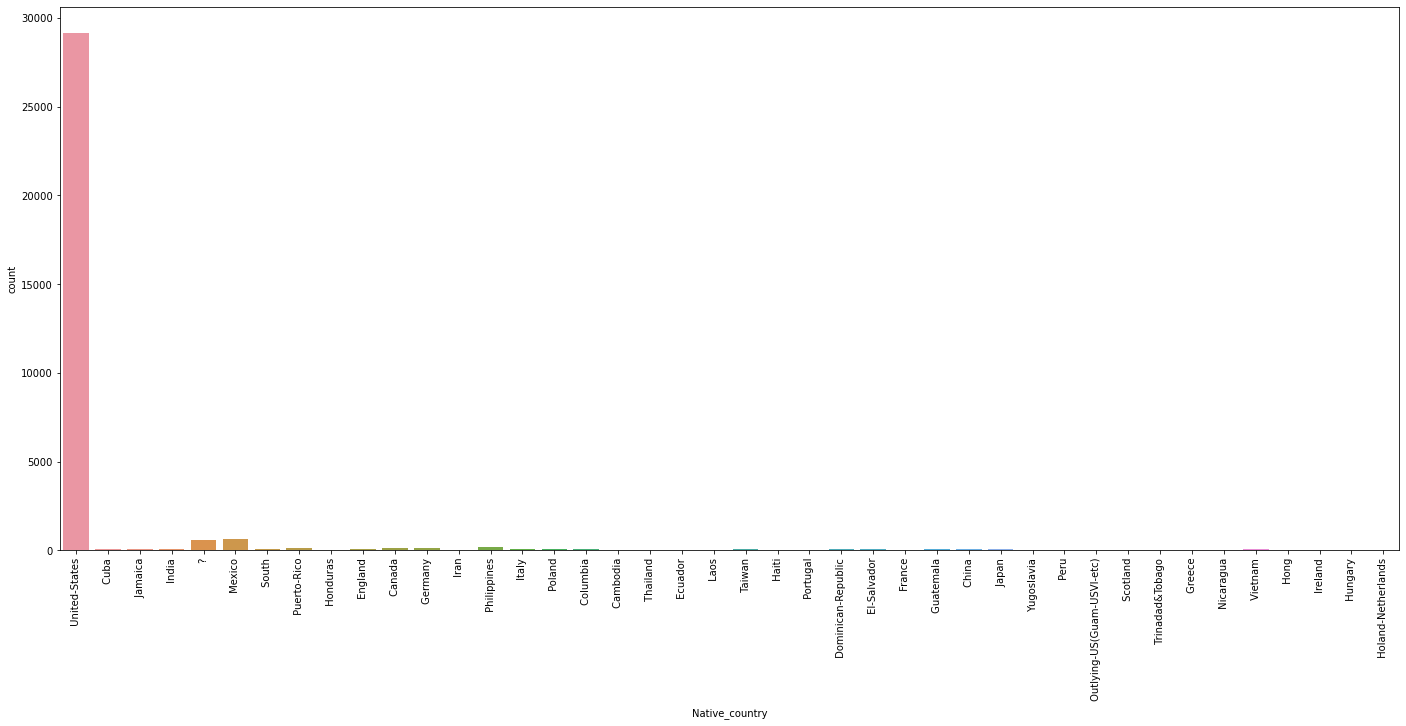

In [18]:
plt.figure(figsize=(24,10))
sns.countplot(df['Native_country']) 
plt.xticks(rotation=90)

>From the above graph we can see that majority of the people are from 'US'. 

(array([0, 1]), [Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')])

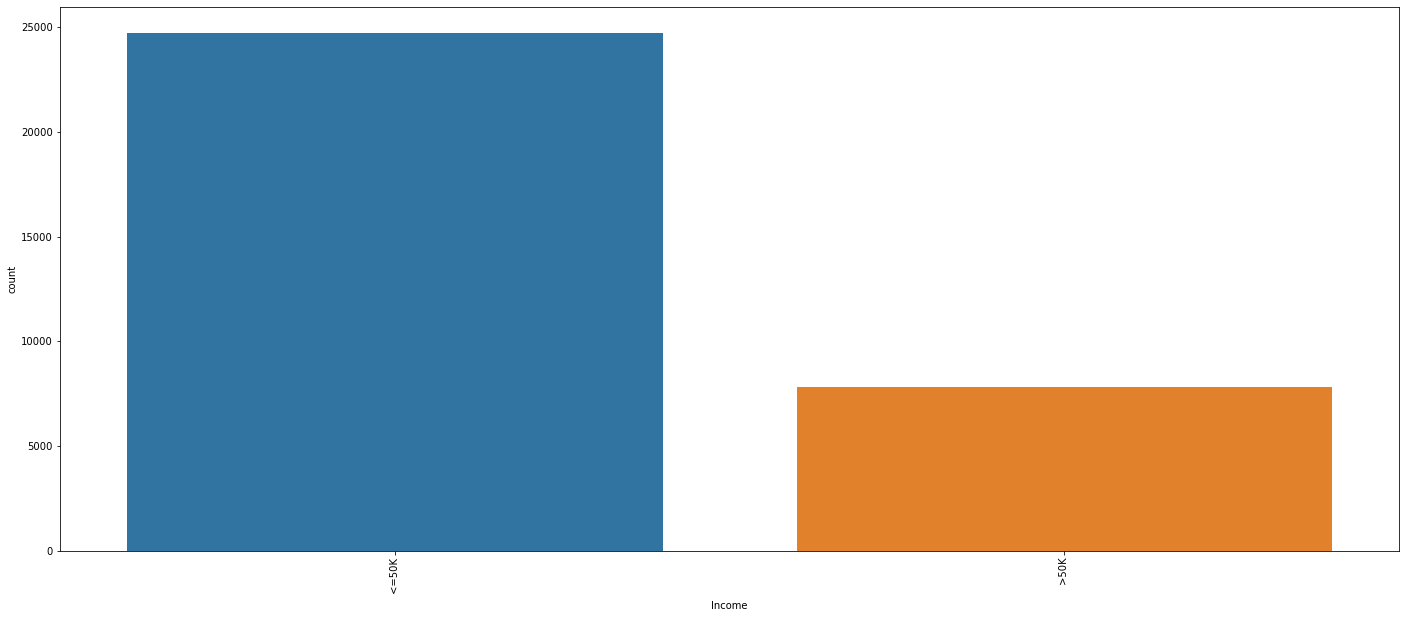

In [19]:
plt.figure(figsize=(24,10))
sns.countplot(df['Income']) 
plt.xticks(rotation=90)

>From the above graph we can see that majority of the people have income less than or  equals to 50k.

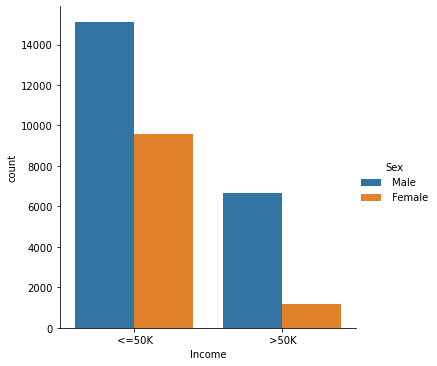

In [20]:
sns.catplot(x ="Income", hue ="Sex",  kind ="count", data = df) 

>From the above graph we can see that in both the cases males are having majority according to this dataset

<AxesSubplot:xlabel='Sex', ylabel='Hours_per_week'>

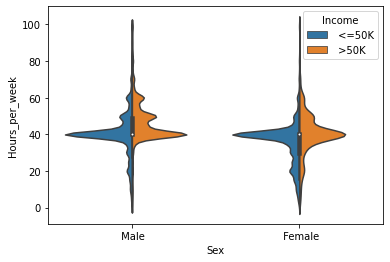

In [21]:
sns.violinplot(x ="Sex", y ="Hours_per_week", hue ="Income",  data = df, split = True) 

>From the above graph we can see that the no of people are more who have salary <=50k and working 40 hours per week in male.

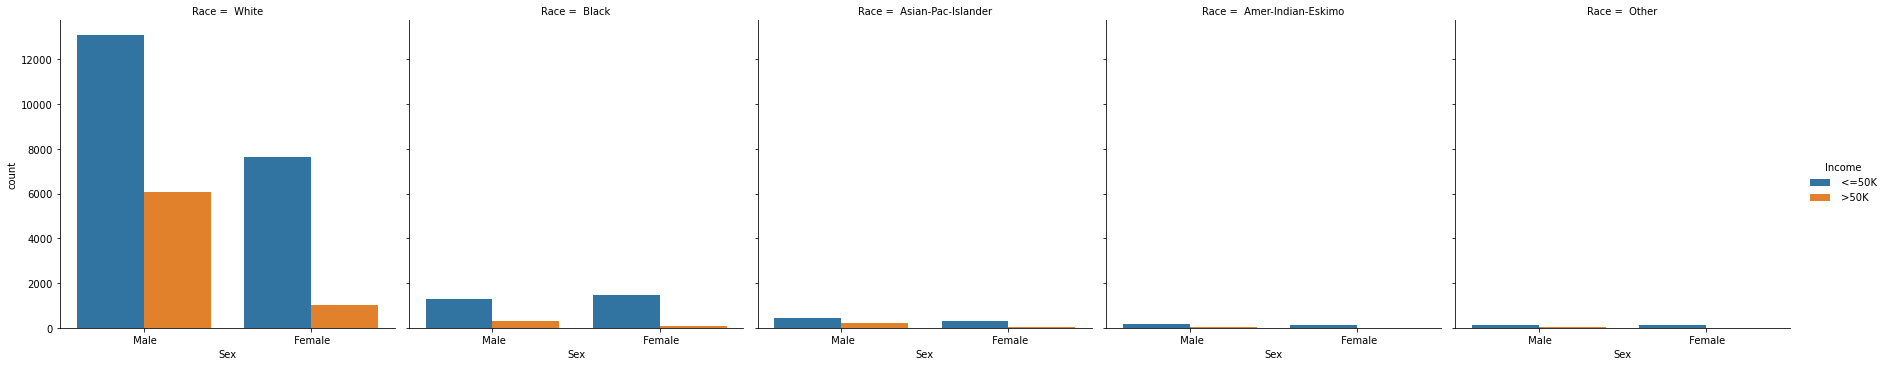

In [22]:
sns.catplot(x ='Sex', hue ='Income', kind ='count', col ='Race', data = df) 

>From the above graph we can see that majority of the people are White and majority of that are male and majority of the male are having <=50k income.

<AxesSubplot:xlabel='Age', ylabel='Density'>

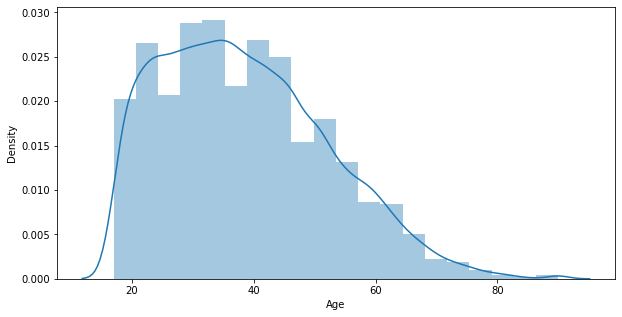

In [23]:
plt.figure(figsize=(10, 5))
sns.distplot(df['Age'], bins=20)

>From the above graph we can see that majority of the people are from age 20 to 45.

<AxesSubplot:xlabel='Age', ylabel='count'>

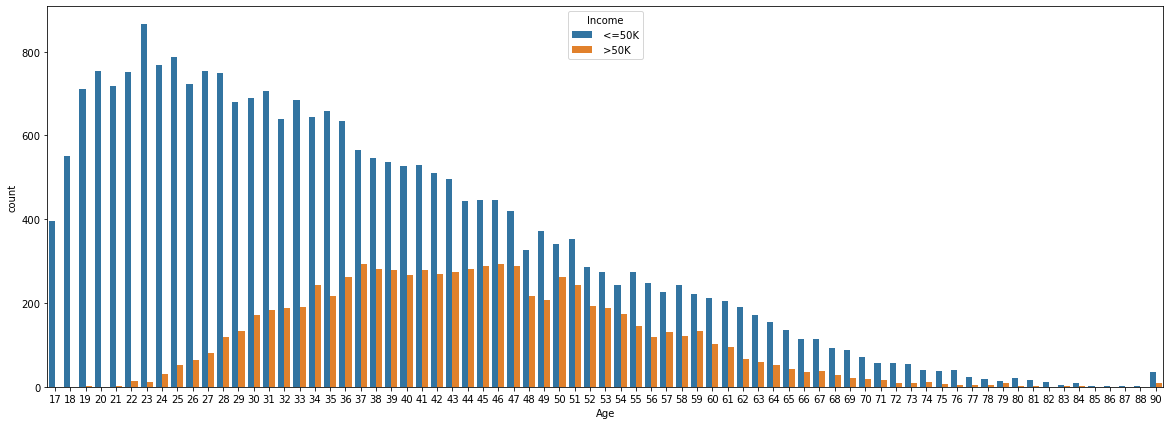

In [24]:
plt.figure(figsize=(20, 7))
sns.countplot(df['Age'], hue=df['Income'])

>From the above graph we can see that from the age of 22 people are getting income of >=50k till age 47, after 47 it is dropping again

<AxesSubplot:xlabel='Education', ylabel='count'>

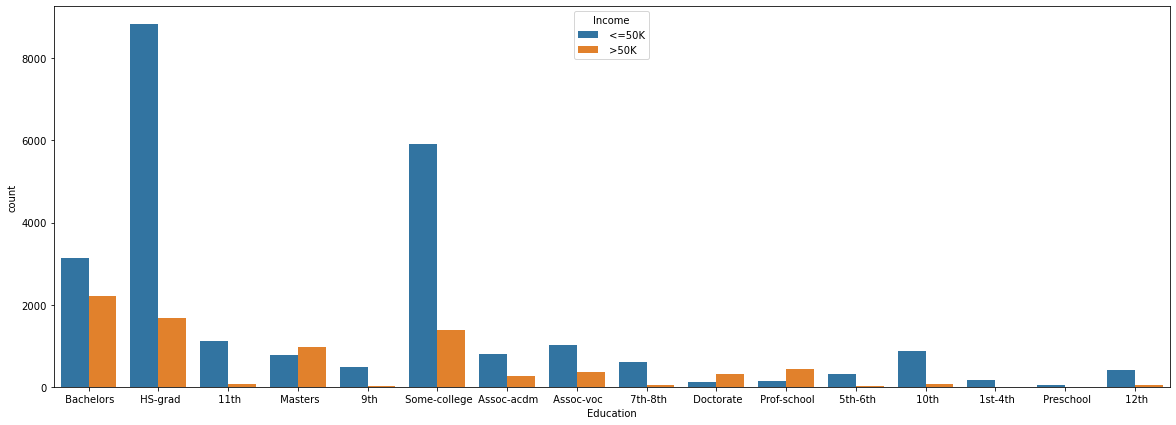

In [25]:
plt.figure(figsize=(20, 7))
sns.countplot(df['Education'], hue=df['Income'])

>We can see that from the above graph that 

>>after doing doctorate or prof-school more people are getting income >=50k.

>>in other education less people are getting income >=50k.

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

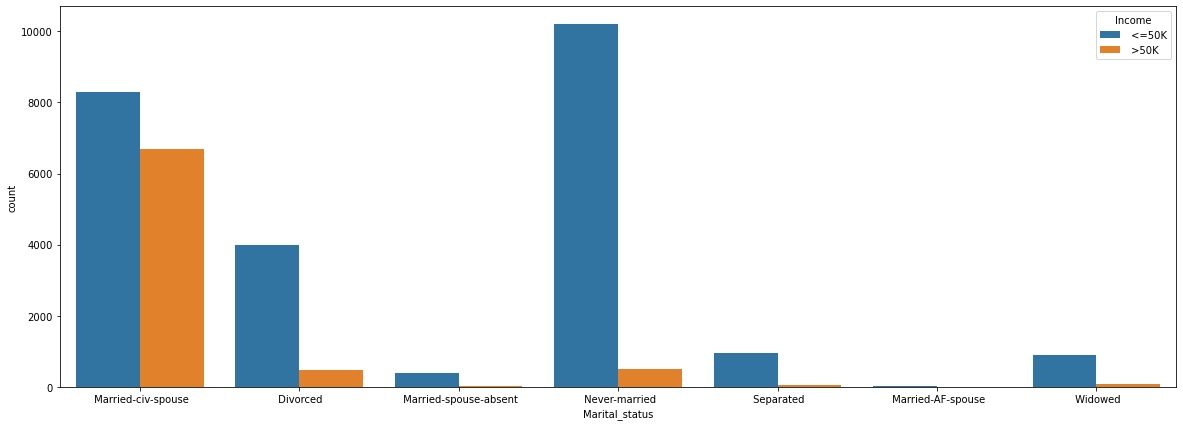

In [26]:
plt.figure(figsize=(20, 7))
sns.countplot(df['Marital_status'], hue=df['Income'])

> From the above graph we  can see that who are married and having spouse have almost same no of people in both the income range.

> Who are never married have majority of the people in <=50k income range.

In [27]:
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [28]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


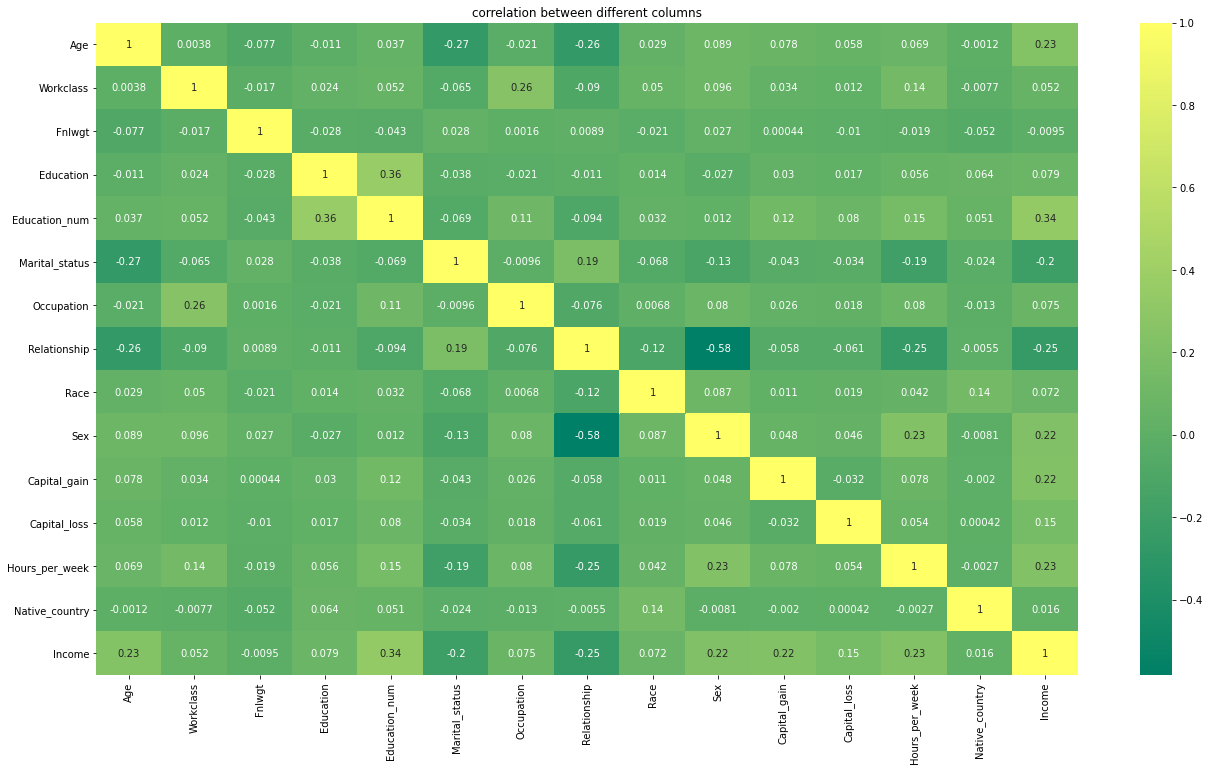

In [29]:
#checking which column is highly correlated to the target column i.e. 'Survived'
corr_df= df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_df,cmap="summer",annot=True)
plt.title('correlation between different columns')
plt.show()

>From the above graph we can see that educational_num is the most positively correlated column with the income.

>Relationship is the most negatively correlated column with the income.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Workclass'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Marital_status'}>],
       [<AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Relationship'}>,
        <AxesSubplot:title={'center':'Race'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>],
       [<AxesSubplot:title={'center':'Hours_per_week'}>,
        <AxesSubplot:title={'center':'Native_country'}>,
        <AxesSubplot:title={'center':'Income'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

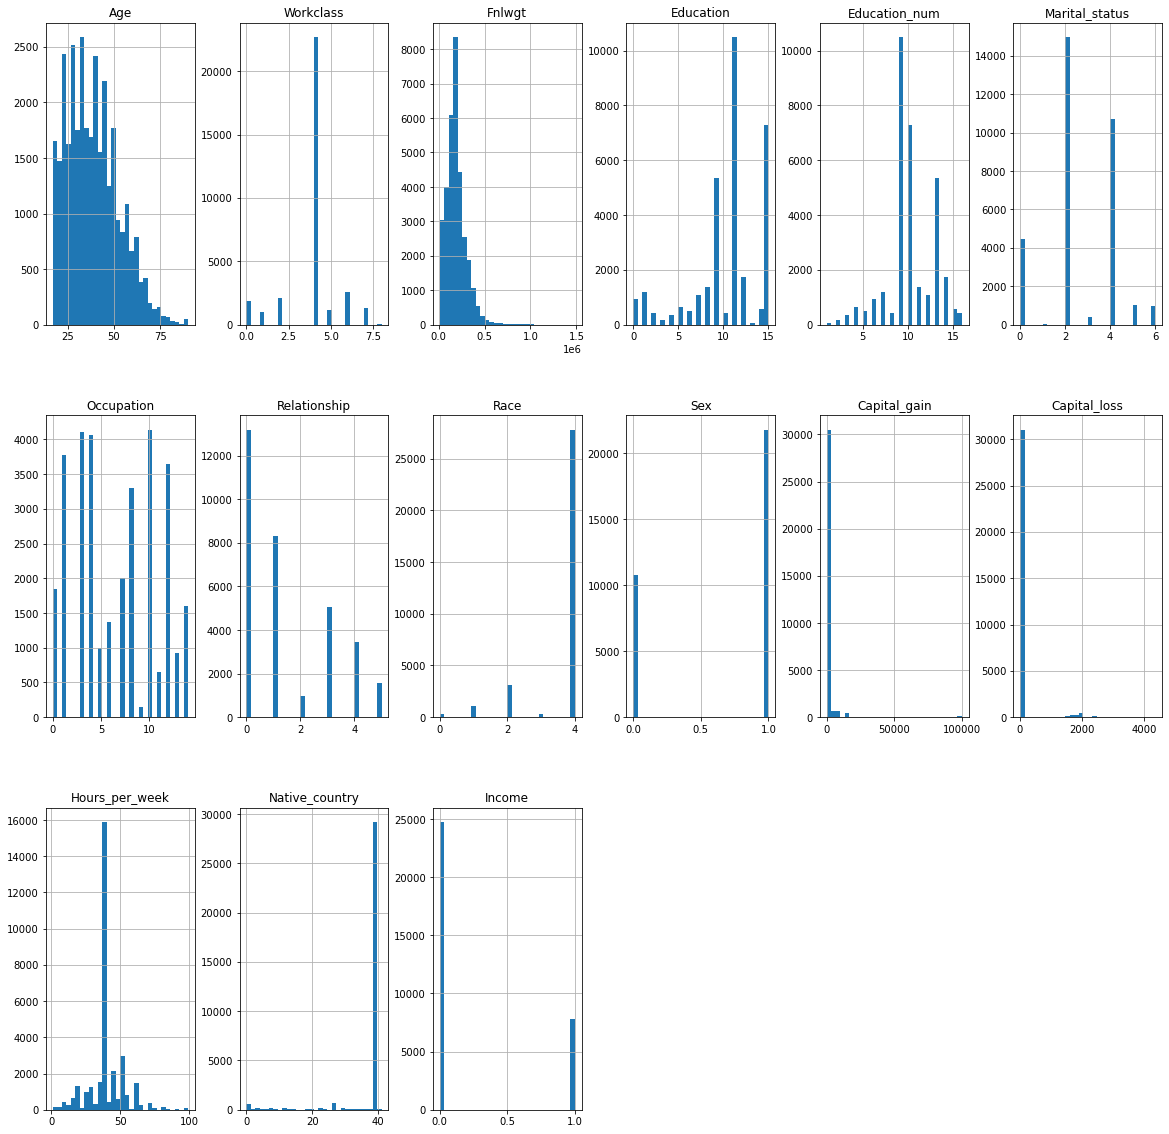

In [30]:
# Histogram to see the data distribution of all the columns
df.hist(figsize=(20,20), grid = True, layout = (3,6), bins = 30)

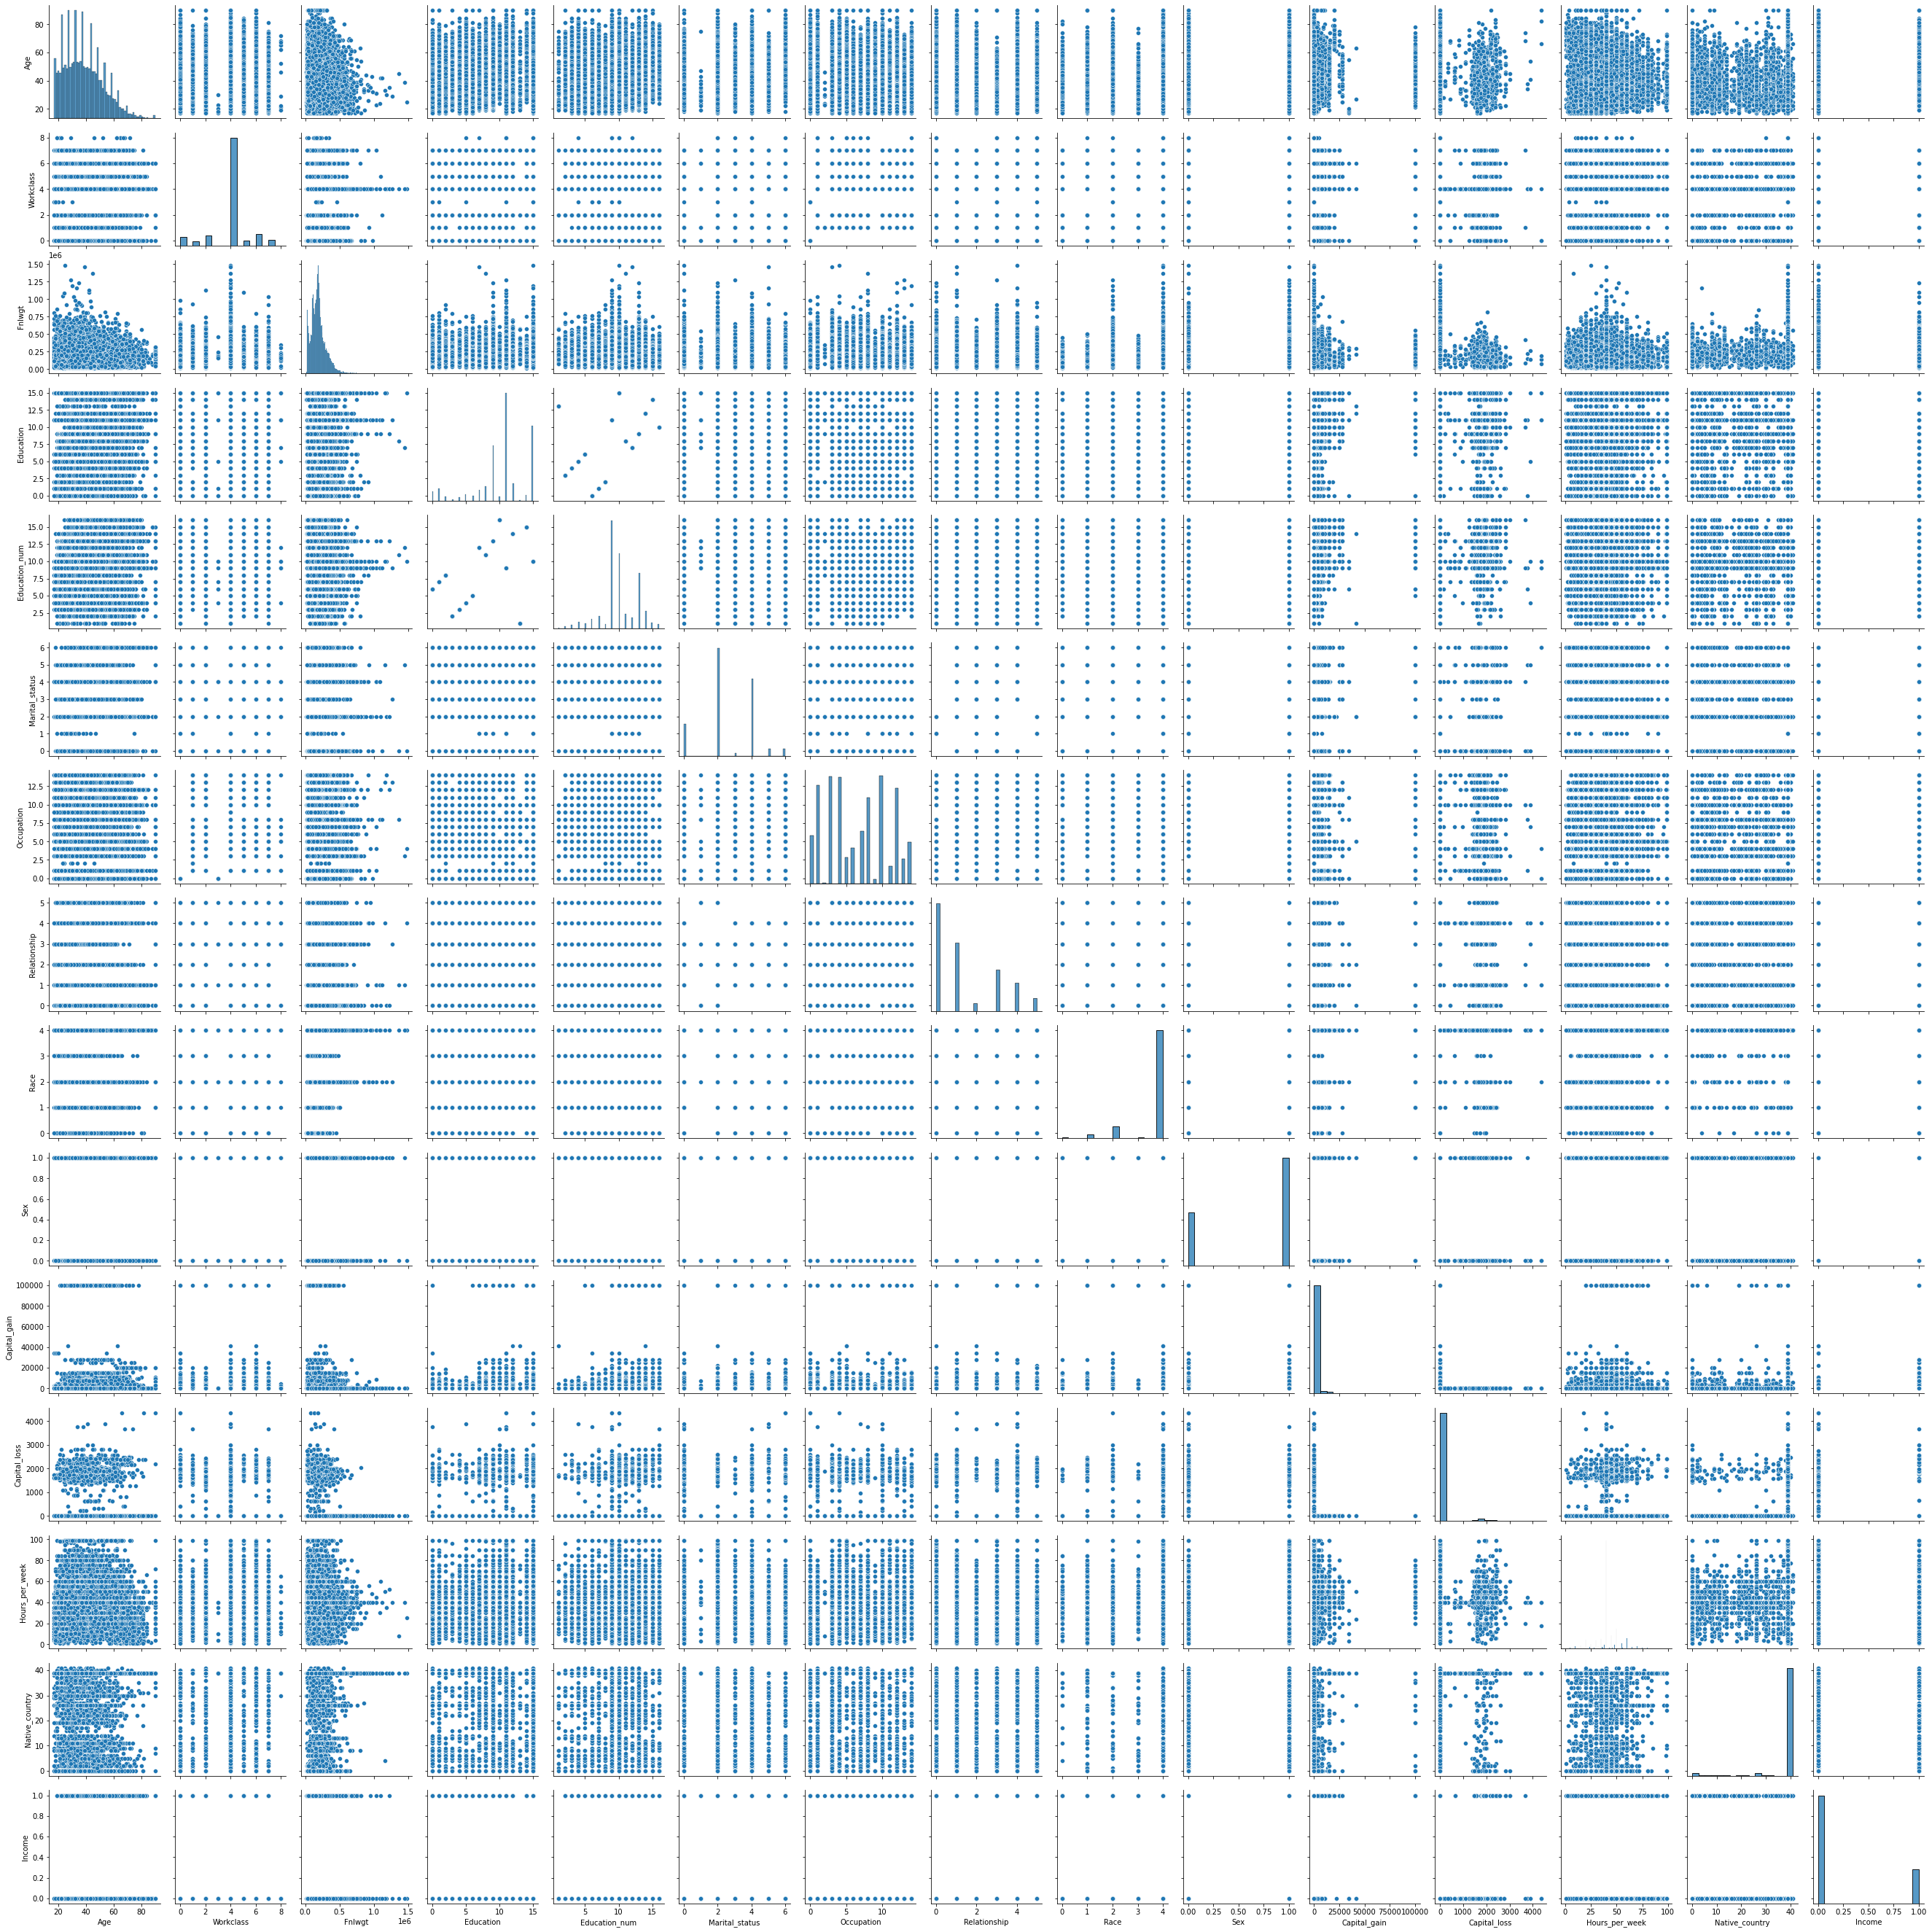

In [31]:
sns.pairplot(df)

In [32]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


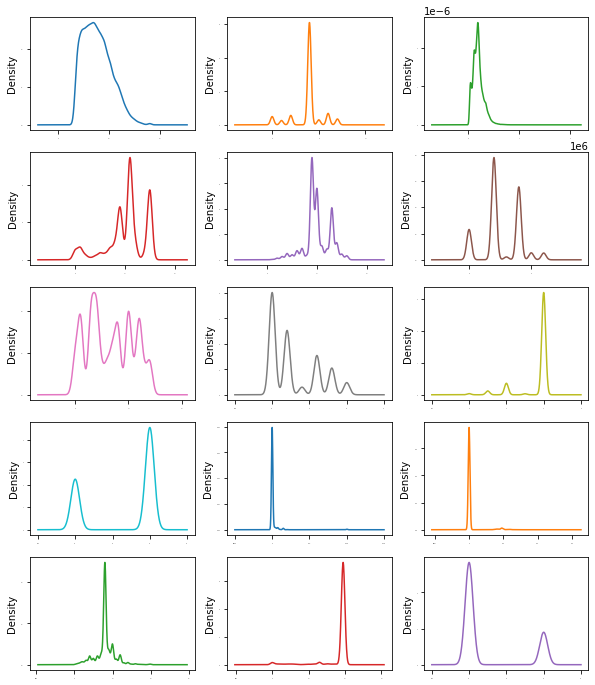

In [34]:
df.plot(kind='density',subplots=True,  layout=(5,3), sharex=False, legend=False, fontsize=1, figsize=(10,12))
plt.show()

In [35]:
#checking the skewness in the data
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

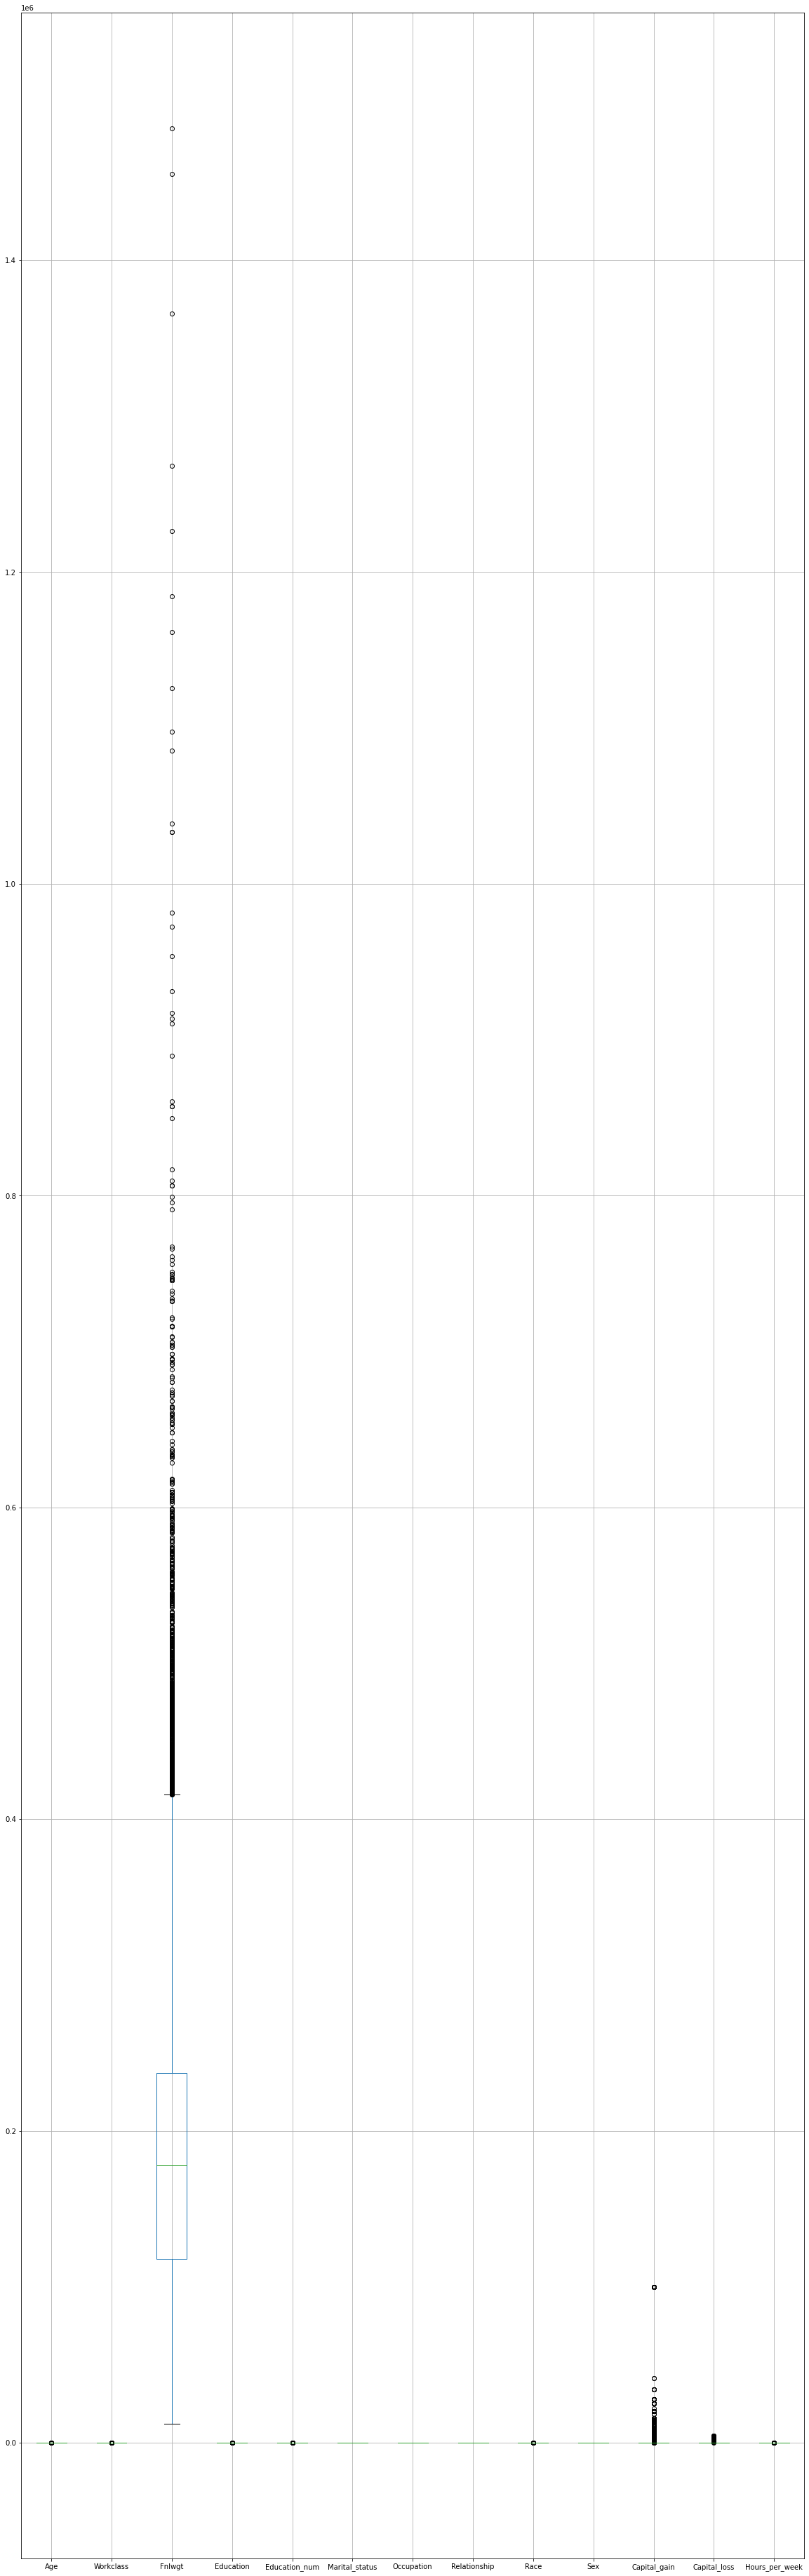

In [36]:
#checking the outliers
df.iloc[:,0:13].boxplot(figsize=[20,80])
plt.subplots_adjust(bottom=0.25)
plt.show()

>As we can see through the above plot that their are considerable outliers present in the dataset. So we have to remove them.

In [37]:
z=np.abs(zscore(df))
z

array([[0.83709708, 1.46388339, 1.0087417 , ..., 2.22212013, 0.29157343,
        0.5632099 ],
       [0.04264043, 0.09012148, 0.24504633, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.05703146, 0.09012148, 0.42576955, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       ...,
       [1.42358875, 0.09012148, 0.3588108 , ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.21562378, 0.09012148, 0.11092744, ..., 1.65520046, 0.29157343,
        0.5632099 ],
       [0.98372   , 0.77700244, 0.92986178, ..., 0.03542999, 0.29157343,
        1.77553698]])

In [38]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int32), array([13, 12,  8, ...,  8,  8,  8], dtype=int32))


In [39]:
df_new=df[(z<3).all(axis=1)]  # removing outliers

In [40]:
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
5,49,4.0,160187,6.0,5,3.0,8.0,1.0,2.0,0.0,0,0,16,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


In [41]:
df_new.skew()

Age                0.483478
Workclass         -0.738023
Fnlwgt             0.626221
Education         -0.957458
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Relationship       0.750207
Race              -2.592931
Sex               -0.684115
Capital_gain       4.934878
Capital_loss      29.325736
Hours_per_week    -0.358396
Native_country    -5.460675
Income             1.324919
dtype: float64

In [42]:
#splitting the dataset into independent and target variables in x and y respectively

x=df_new.drop('Income', axis=1)
y=df_new['Income']

In [43]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0
5,49,4.0,160187,6.0,5,3.0,8.0,1.0,2.0,0.0,0,0,16,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0


In [44]:
y

0        0.0
1        0.0
2        0.0
4        0.0
5        0.0
        ... 
32555    0.0
32556    1.0
32557    0.0
32558    0.0
32559    1.0
Name: Income, Length: 27417, dtype: float64

>As this is a categorical type of dataset we don't have to remove skewness from the dataset.

In [45]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.7987051474946428
At random state 0, the testing accuracy is:- 0.8056163384390955


At random state 1, the training accuracy is:- 0.809419596042493
At random state 1, the testing accuracy is:- 0.8070751276440554


At random state 2, the training accuracy is:- 0.7990243012811745
At random state 2, the testing accuracy is:- 0.8059810357403355


At random state 3, the training accuracy is:- 0.7992066748734783
At random state 3, the testing accuracy is:- 0.8021517140773158


At random state 4, the training accuracy is:- 0.8023526193407194
At random state 4, the testing accuracy is:- 0.8016046681254558


At random state 5, the training accuracy is:- 0.7990698946792505
At random state 5, the testing accuracy is:- 0.8023340627279358


At random state 6, the training accuracy is:- 0.802945333515707
At random state 6, the testing accuracy is:- 0.799051787016776


At random state 7, the training accuracy is:- 0.8004376966215292
At random state 7, th

At random state 62, the training accuracy is:- 0.8008024438061369
At random state 62, the testing accuracy is:- 0.8057986870897156


At random state 63, the training accuracy is:- 0.7983404003100351
At random state 63, the testing accuracy is:- 0.8070751276440554


At random state 64, the training accuracy is:- 0.801759905165732
At random state 64, the testing accuracy is:- 0.7944930707512764


At random state 65, the training accuracy is:- 0.7980212465235034
At random state 65, the testing accuracy is:- 0.8030634573304157


At random state 66, the training accuracy is:- 0.8007112570099849
At random state 66, the testing accuracy is:- 0.8047045951859956


At random state 67, the training accuracy is:- 0.8019422787580358
At random state 67, the testing accuracy is:- 0.8017870167760759


At random state 68, the training accuracy is:- 0.8008024438061369
At random state 68, the testing accuracy is:- 0.7986870897155361


At random state 69, the training accuracy is:- 0.8000729494369215
At r

>From the above stats, at random state 27 the testing accuracy and training accuracy is hightest.

>Testing the best Random State in different algorithms

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=27)

In [47]:
model=[LogisticRegression(),SVC(),RandomForestClassifier(),AdaBoostClassifier(),DecisionTreeClassifier()]

In [48]:
for n in model:
    n.fit(x_train,y_train)
    n.score(x_train,y_train)
    predm=n.predict(x_test)
    print('accuracy score of',n,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.8161925601750547
[[4230   56]
 [ 952  246]]
              precision    recall  f1-score   support

         0.0       0.82      0.99      0.89      4286
         1.0       0.81      0.21      0.33      1198

    accuracy                           0.82      5484
   macro avg       0.82      0.60      0.61      5484
weighted avg       0.82      0.82      0.77      5484



accuracy score of SVC() is:
0.812727935813275
[[4280    6]
 [1021  177]]
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89      4286
         1.0       0.97      0.15      0.26      1198

    accuracy                           0.81      5484
   macro avg       0.89      0.57      0.57      5484
weighted avg       0.84      0.81      0.75      5484



accuracy score of RandomForestClassifier() is:
0.8548504741064916
[[3995  291]
 [ 505  693]]
              precision    recall  f1-score   support

         0.0       0.89      0.9

>Now checking cross validation score to check whether our models are overfitted or underfitted.

In [49]:
scrlr=cross_val_score(LogisticRegression(),x,y, cv=5)
print('cross validation score of logisticregression: ',scrlr.mean())

cross validation score of logisticregression:  0.8023124589191738


In [50]:
scrrf=cross_val_score(RandomForestClassifier(),x,y, cv=5)
print('cross validation score of randomforestclassifier: ',scrrf.mean())

cross validation score of randomforestclassifier:  0.8513696069796264


In [51]:
scrdtc=cross_val_score(DecisionTreeClassifier(),x,y, cv=5)
print('cross validation score of decisiontree classifier: ',scrdtc.mean())

cross validation score of decisiontree classifier:  0.8056315768399189


In [52]:
scrsvc=cross_val_score(SVC(),x,y, cv=5)
print('cross validation score of SVC: ',scrsvc.mean())

cross validation score of SVC:  0.8078929262558511


In [53]:
scrada=cross_val_score(AdaBoostClassifier(),x,y, cv=5)
print('cross validation score of AdaBoostClassifier: ',scrada.mean())

cross validation score of AdaBoostClassifier:  0.8589563883752884


>As we can see the Minimum difference in accuracy score and cross validation score is for SVC, AdaBoost, DecisionTree(0) so they are our best model.

>Doing GridSearchCV for getting best parameters for AdaBoostClassifier()

In [54]:
#creating parameter list to pass in GridSearchCV
parameters= {'n_estimators': np.arange(10,60,5),
             'algorithm': ['SAMME', 'SAMME.R'],
             'learning_rate': np.arange(0,10),}

In [55]:
GCV=GridSearchCV(AdaBoostClassifier(),parameters,cv=5)

In [56]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])})

In [57]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 55}

In [58]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [59]:
accuracy_score(GCV_pred,y_test)

0.8608679795769512

In [60]:
joblib.dump(GCV.best_estimator_,'Census_income.obj')

['Census_income.obj']

>Case Study:

>>This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) & (AGI>100) & (AFNLWGT>1) & (HRSWK>0)).  

>>The prediction task is to determine whether a person makes over $50K a year.






>Findings:

>>their is no null values present in the dataset.

>>majority of the people are having private job.

>>majority of the people had done 'HS-grad'.

>> majority of the people are married and have spouse also.

>> majority of the people are 'Exec-managerial','Prof-specialty' or 'Craft-repair'.

>> majority of the people are 'husbands' who are doing job and getting salary.

>>majority of the people are white who are getting salary.

>>majority of the people are 'male'.

>> majority of the people are doing 40 hours per week.

>>majority of the people are from 'US'.

>>majority of the people have income less than or equals to 50k.

>>males are having majority in both the income category according to this dataset.

>> the no of people are more who have salary <=50k and working 40 hours per week in male.

>>majority of the people are White and majority of that are male and majority of the male are having <=50k income.

>> majority of the people are from age 20 to 45.

>> the age of 22 people are getting income of >=50k till age 47, after 47 it is dropping again

>>after doing doctorate or prof-school more people are getting income >=50k.

>>in other education less people are getting income >=50k.

>>educational_num is the most positively correlated column with the income.

>>Relationship is the most negatively correlated column with the income.



>Predictions:

>> at random state 27 the testing accuracy and training accuracy is hightest.

>>The best accuracy_score is for AdaBoost Classifier.

>>the Minimum difference in accuracy score and cross validation score is for SVC, AdaBoost, DecisionTree(0) so they are our best model.

>>After doing Hyper parameter tuning, we are getting 86% model accuracy.